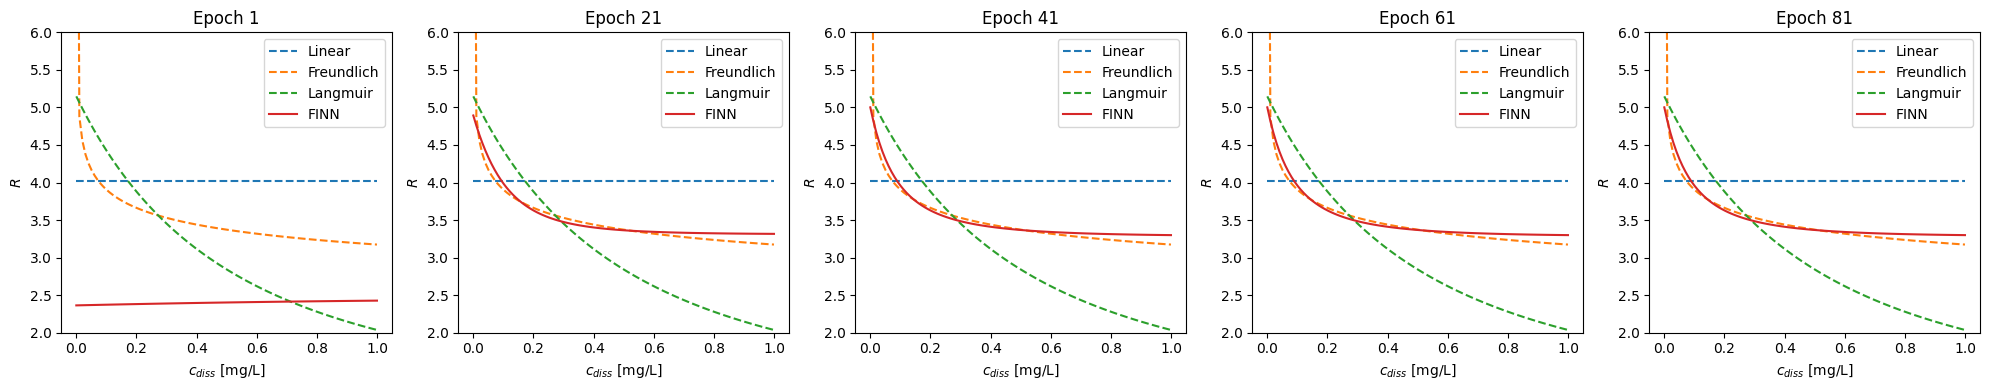

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


def plot_retardation():
    base_dir = Path("data_out").resolve()

    # Load retardation data for different models
    u = np.load(base_dir / "u_ret.npy")
    retardation_linear = np.load(base_dir / "retardation_linear.npy")
    retardation_freundlich = np.load(base_dir / "retardation_freundlich.npy")
    retardation_langmuir = np.load(base_dir / "retardation_langmuir.npy")


    fig, ax = plt.subplots()
    ax.set_ylim([2, 6])
    plt.plot(u, retardation_linear, linestyle="--", label="Linear")
    plt.plot(u, retardation_freundlich, linestyle="--", label="Freundlich")
    plt.plot(u, retardation_langmuir, linestyle="--", label="Langmuir")

    ret_pred, = ax.plot(u, np.zeros_like(u), label="FINN")

    plt.title("Predicted Retardation Factor", fontsize=16)
    plt.xlabel(r"$c_{diss}$ [mg/L]", fontsize=16)
    plt.ylabel(r"$R$", fontsize=16)
    plt.legend(fontsize=16)
    plt.tight_layout()

    pred_ret_path = Path("syn_freundlich_01").resolve()

    def update(epoch):
        ret_pred_data = np.load(pred_ret_path / f"retPred_{epoch}.npy")
        ret_pred.set_ydata(ret_pred_data)
        ax.set_ylim([2, 6])
        ax.set_title(f"Predicted Retardation Factor (Epoch {epoch})")

    ani = animation.FuncAnimation(fig, update, frames=range(1, 51), interval=200)

    # Save the animation as gif
    ani.save("retardation_animation.gif", writer="imagemagick")

    # Display the animation in the notebook
    plt.close(fig)
    display(HTML(ani.to_jshtml()))

    # Display static images for the 10th, 20th, 30th, 40th, and 50th epochs
    all_epochs = sorted([int(p.stem.split("_")[-1]) for p in pred_ret_path.glob("retPred_*.npy")])
    epochs = all_epochs[::max(1, len(all_epochs) // 5)]
    fig, axes = plt.subplots(1, len(epochs), figsize=(4*len(epochs), 4))
    for ax, epoch in zip(axes, epochs):
        ret_pred_data = np.load(pred_ret_path / f"retPred_{epoch}.npy")
        ax.plot(u, retardation_linear, linestyle="--", label="Linear")
        ax.plot(u, retardation_freundlich, linestyle="--", label="Freundlich")
        ax.plot(u, retardation_langmuir, linestyle="--", label="Langmuir")
        ax.plot(u, ret_pred_data, label="FINN")
        ax.set_title(f"Epoch {epoch}")
        ax.set_xlabel(r"$c_{diss}$ [mg/L]")
        ax.set_ylabel(r"$R$")
        ax.set_ylim([2, 6])
        ax.legend()

    plt.tight_layout()
    plt.show()


# def plot_full_field():
#     plt.figure(figsize=(10.0, 5.0))
#     plt.subplot(121)
#     plt.pcolormesh(self.x, self.t, data)
#     if diss:
#         caption = "Dissolved"
#         save_name = "diss"
#     else:
#         caption = "Total"
#         save_name = "tot"
#     plt.title(caption + " Concentration Data", fontsize=16)
#     plt.xlabel("Depth [m]", fontsize=16)
#     plt.ylabel("time [days]", fontsize=16)
#     plt.colorbar()
#     plt.clim([0, torch.max(data)])

#     plt.subplot(122)
#     plt.pcolormesh(self.x, self.t, pred.cpu().detach())
#     plt.title(caption + " Concentration Prediction", fontsize=16)
#     plt.xlabel("Depth [m]", fontsize=16)
#     plt.ylabel("time [days]", fontsize=16)
#     plt.colorbar()
#     plt.clim([0, torch.max(data)])
#     plt.tight_layout()
#     plt.savefig(cfg.model_path / f"{cfg.model_name}_c_{save_name}.png")

plot_retardation()

src/finn/UQnet/syn_freundlich_01
src/finn/UQnet/syn_freundlich_01